In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [3]:
# This funtion produces a dictionary that maps each GO term to a tissue in GTEX (if we have connected the two via BTO)
def map_GO_to_GTEX():
    inputFilename = '../data/Tissue_Name_Mappings.csv'
    tissue_data = pd.read_csv(inputFilename,header=None)
    map_BTO_to_GTEX = defaultdict(list)

    for index,row in tissue_data.iterrows():
        GTEX_tissue = row[0]
        BTO_tissues = row[1:]
        for tissue in BTO_tissues.dropna():
            map_BTO_to_GTEX[tissue].append(GTEX_tissue)



    inputFilename = '../data/BTO_GO.csv'
    BTO_data = pd.read_csv(inputFilename,skiprows=[0])
    map_GO_to_GTEX = defaultdict(list)

    for index,row in BTO_data.iterrows():
        tissue = row[1]
        if tissue in map_BTO_to_GTEX:
            GO_IDs = row[2:]
            for GO_ID in GO_IDs.dropna():
                map_GO_to_GTEX[GO_ID] = map_GO_to_GTEX[GO_ID] + map_BTO_to_GTEX[tissue]

    #inputFile.close()
    return map_GO_to_GTEX

[  1   1   1   1   1   1   2   2   3   4   4  10  12  12  13  14  15  16
  18  18  19  21  25  29  35  35  35  37  40  61  64  66  76  76 155 250
 263 264 264 264 264 264 265 270 270 270 297 299 305 345 348 425 595]


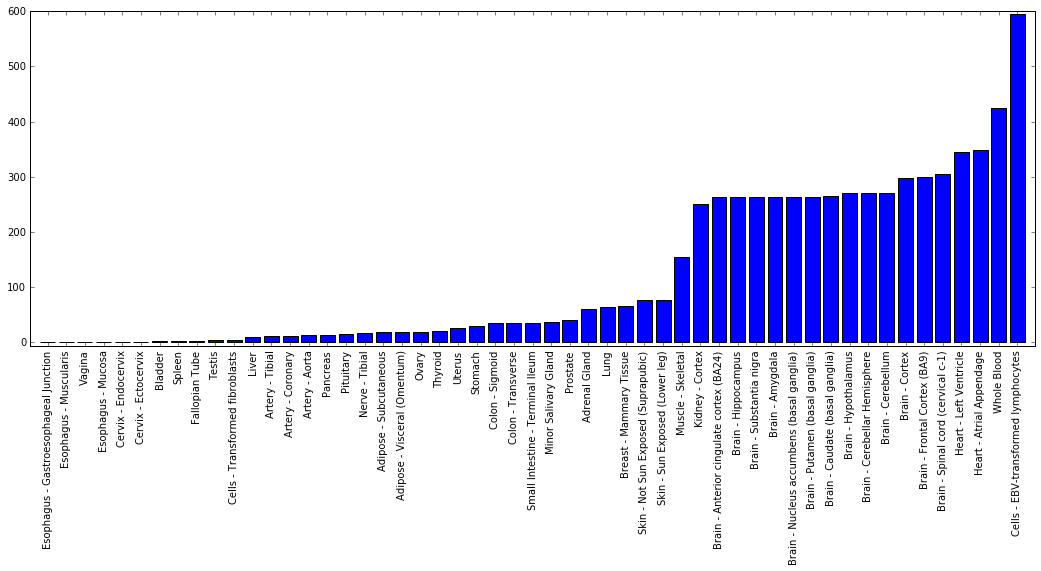

In [29]:
# Create dictionary that maps GTEX tissues to GO terms and create histogram

GOmap = map_GO_to_GTEX()
GTEXmap = defaultdict(list)
for GO_ID,tissues in GOmap.items():
    for tissue in tissues:
        if GO_ID not in GTEXmap[tissue]:
            GTEXmap[tissue].append(GO_ID)
num_GO = [len(array) for array in GTEXmap.values()]
index_order = np.argsort(num_GO) # sort in order
#index_order = range(len(num_GO)) # leave in order of dictionary
tissues = np.array(GTEXmap.keys())[index_order]
values = np.array(num_GO)[index_order]

plt.figure(figsize=(18, 6))
plt.margins(0.01)
plt.bar(range(len(tissues)), values, align='center')
plt.xticks(range(len(tissues)), tissues, rotation='vertical')
plt.show()

In [27]:
# function takes result file and returns GO_ID and array of coefficients
def get_coeff(input_file):
    results = open(input_file)
    nextline = 0
    for line in results:
        data = line.split()
        if data[1] == 'Prediction':
            GO_ID = data[len(data)-1]
        elif data[1] == 'Coefficients:':
            nextline = 1
        elif nextline == 1:
            coeffs = (data)
            break
    return [GO_ID, coeffs]

In [28]:
# function takes GO term, array of coefficients, and (optional) highlighted tissues, and plots accordingly
def plot_coeff(GO_ID, coeffs, highlight = []):
    samples = open('../data/samples_to_tissues_map.txt')
    tissue_type = np.loadtxt(samples,dtype='S40',delimiter='\t')
    tissue_list = pd.unique(tissue_type[:,2]) # pandas maintains correct order, numpy doesn't
    
    plt.figure(figsize=(18, 6))
    plt.margins(0.01)
    ax = plt.gca()
    ax.xaxis.grid(which='both')
    plt.xticks(range(len(tissue_list)), tissue_list, rotation='vertical')
    
    x = np.array([np.where(tissue_list == tissue)[0][0] for tissue in tissue_type[:,2]])
    y = np.array(coeffs)
    
    if highlight:
        ix = np.in1d(tissue_type[:,2], highlight)
        ind = np.where(ix)[0]
        x_part = x[ind]
        y_part = y[ind]
        plt.plot(x_part, y_part, 'ro')
        x_part = np.delete(x,ind)
        y_part = np.delete(y,ind)
        plt.plot(x_part,y_part,'bo')
    else:
        plt.plot(x, coeffs, 'bo')
    
    plt.show()

## Blood Example 1

[]


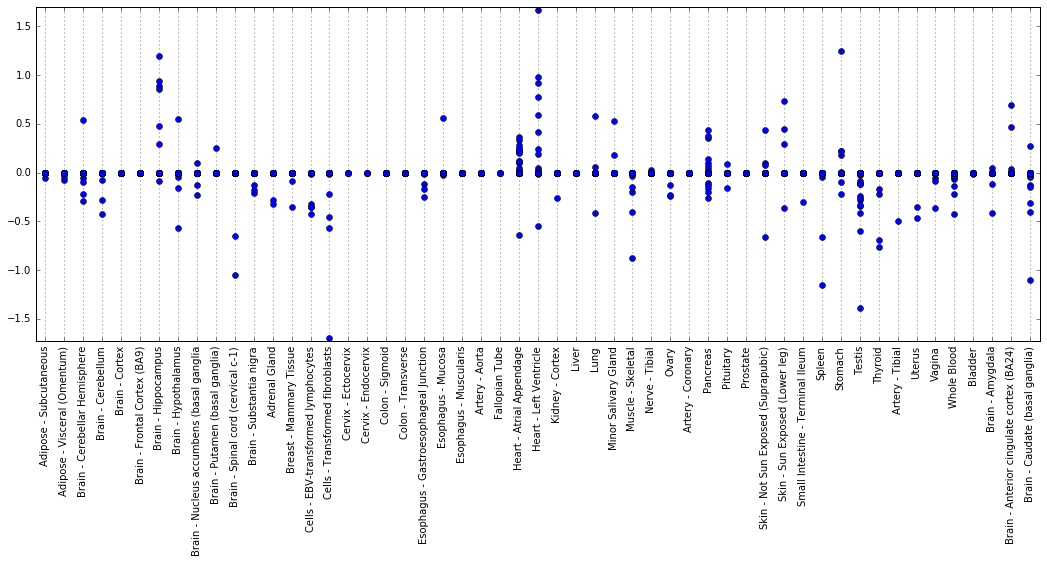

In [34]:
[GO_ID, coeffs] = get_coeff('../data/results_logreg_scaled_subset/result_logreg_GO:0045664.txt')
GOmap = map_GO_to_GTEX()
tissues = GOmap[GO_ID]
print tissues
#tissues = [['Whole Blood','Lung']]
plot_coeff(GO_ID,coeffs,highlight = tissues)

## Blood Example 2

['Whole Blood']


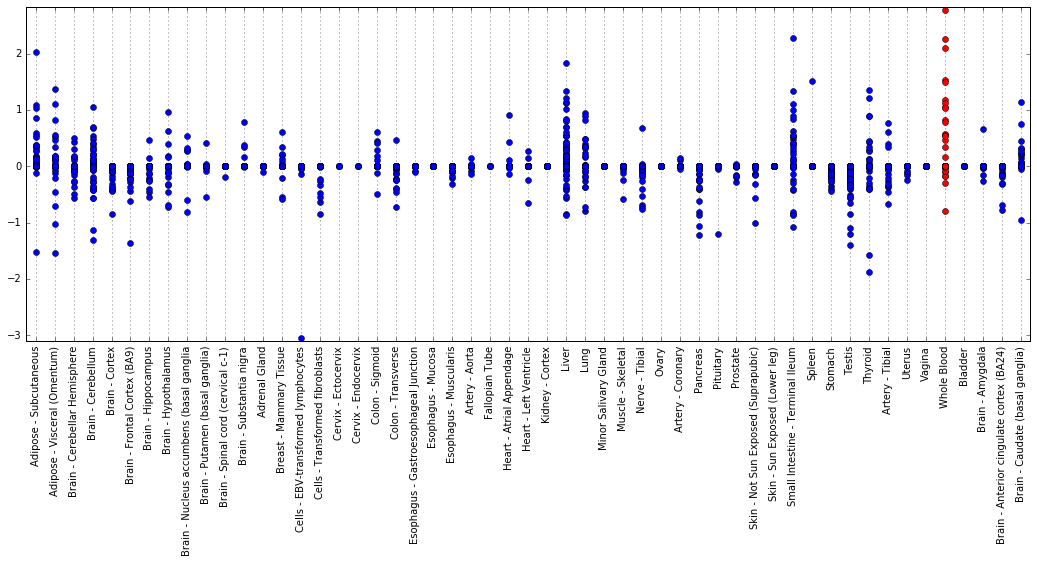

In [41]:
[GO_ID, coeffs] = get_coeff('../data/results_logreg_subset_useful/result_logreg_GO:0071827.txt')
GOmap = map_GO_to_GTEX()
tissues = GOmap[GO_ID]
print tissues
#tissues = [['Whole Blood','Lung']]
plot_coeff(GO_ID,coeffs,highlight = tissues)

## Kidney Example (Doesn't Work Well)

['Whole Blood', 'Whole Blood']


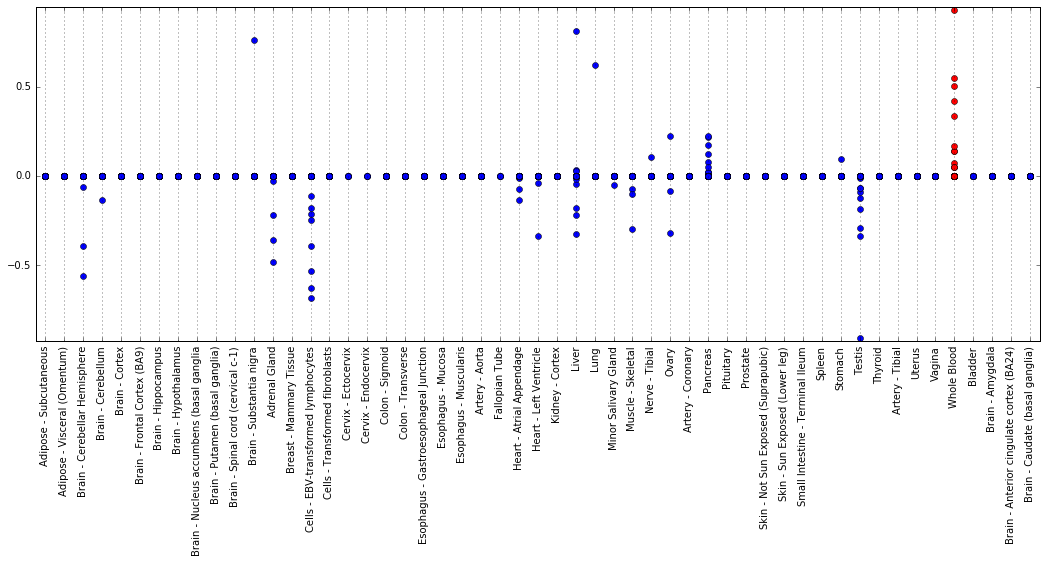

In [32]:
[GO_ID, coeffs] = get_coeff('../data/results_logreg_subset_useful/result_logreg_GO:0070527.txt')
GOmap = map_GO_to_GTEX()
tissues = GOmap[GO_ID]
print tissues
#tissues = [['Whole Blood','Lung']]
plot_coeff(GO_ID,coeffs,highlight = tissues)